# Dimension Reduction

This lecture focuses on "feature projection": transforming data with many features (i.e. high-dimensional space) to a space with fewer dimensions.  In this module, we will cover:
* Low-rank approximations (SVD) & Principal component analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Estimating Intrinsic Dimension using nearest neighbors
* Manifold Learning: Laplacian Eigenmaps 

## Low-rank approximations: SVD

Recall from a few weeks ago (when we were studying least squares), that every data matrix, $X$ has a QR factorization, i.e., we can find matrices $Q$ and $R$ such that $A = Q\,R$, where $Q$ is an orthogonal matrix, and $R$ is upper triangular.  If $X$ is an $m \times n$ matrix, then 
- $Q$ is an $m \times m$ matrix, whose columns are orthonormal to each other, i.e.:

    - $q_i \cdot q_j = 0$ if $i\neq j$

    - $q_i \cdot q_i = 1, \quad i=1,2,\ldots,m$
  
  The matrix $Q$ has the special property tha $Q^{-1} = Q^T$.
  
- $R$ is an $m \times n$ upper triangular matrix, i.e., $r_{ij} = 0$ if $i > j$.

It turns out, that there is another useful factorization, called the singular value decomposition (SVD).  Specifically, every matrix $X$ also has an SVD decomposition, i.e., we can find matrices $U$,$S$ and $V$ such that $X = U\,S\,V^T$, where $U$ and $V$ are orthogonal matrices.  Again, if $X$ is an $m \times n$ matrix, then
- $U$ is an orthogonal matrix of size $m \times m$,   
- $S$ is a diagonal matrix with non-negative entries on the diagonal, and whose diagonal elements satisfy 
\begin{align*}
\sigma_1 \ge \sigma_2 \ge \cdots \ge \sigma_r > 0,
\end{align*}
where $r = \text{rand}(X)$ is the rank of the data matrix, i.e. the number of linearly independent rows/columns, whichever is less.
- $V$ is an orthogonal matrix of size $n \times n$.

Recall our toy problem:  Suppose we have two packages that we wish to ship. We measure the weight of these two packages in the office. Package $A$ measures in at 2 pounds, package B measures in at $5$ pounds. At the distribution site however, the two packages are weighed together, and the joint weight is reported at 8 pounds. 

In [1]:
import numpy as np
X = np.array( [ [1,0], [0,1], [1,1]])
print("our matrix X:")
print(X)
y = np.array( [[2],[5],[8]])
print("our target y:")
print(y)

our matrix X:
[[1 0]
 [0 1]
 [1 1]]
our target y:
[[2]
 [5]
 [8]]


In [ ]:
[U,S,V] = np.linalg.svd(X, full_matrices = True)
print("Size of U: ")
print(U.shape)
print(U)
print("Size of S: ")
print(S.shape)
print(S)
print("Size of V")
print(V.shape)

As before, a reduced factorization is possible.  

In [ ]:
[U,S,V] = np.linalg.svd(X, full_matrices = False)
print("Size of U: ")
print(U.shape)
print("Size of S: ")
print(S.shape)
print("Size of V")
print(V.shape)
print("reconstructing X")
print(np.dot(U*S,V))

If you stares at the decomposition carefully,
\begin{align}
X &= U\,S\,V^T \\
&= 
\begin{bmatrix}
u_1 | u_2 | \cdots u_m
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & \cdots & &  \\
0 & \sigma_2 & 0 & & \\
 &  &  \ddots & & \\
& & 0 & \sigma_n \\
0 & 0 & \cdots& 0 \\
\vdots & & & \vdots 
\end{bmatrix}
\begin{bmatrix}
v_1^T\\
v_2^T\\
\vdots \\
v_n^T
\end{bmatrix}
\end{align}
you observe that the matrix can be expressed as a sum of rank-one matrices,
\begin{align}
X = \sum_{i=1}^n \sigma_i u_i v_i^T.
\end{align}
If the data matrix is of rank $r$, where $r < \min{(m,n)}$, then $\sigma_{r+1} = \cdots = \sigma_n = 0$, hence,
\begin{align}
X = \sum_{i=1}^r \sigma_i u_i v_i^T.
\end{align}
Since $\sigma_i$ is in non-increasing, it turns out that the sum is in terms of decreasing contribution of rank-one matrices.  This leads to a notion of low-rank approximation to matrices.  The idea, is to pick a rank $k < r$ which suitably approximates the data matrix $A$.  We take the $k$ largest contributions of rank-one matrices,
\begin{align}
X = \sum_{i=1}^k \sigma_i u_i v_i^T.
\end{align}


Let's load in a grayscale image and explore low-rank approximations of these images. We will use some built in images from the sci-kit family.

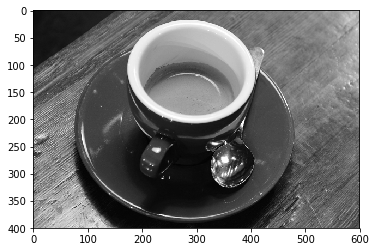

In [3]:
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float

import numpy as np
import matplotlib.pyplot as plt 

img = rgb2gray(img_as_float(data.coffee()))

plt.gray()
_ = plt.imshow(img)

Exercise: 
1. generate a semilog plot of the singular values as a function of index.  (see matplotlib.pyplot.semilogy)
2. using the above information, generate various low-rank approximations to the black and white image.  Display your images using 2x2 or 3x3 grid of subplots

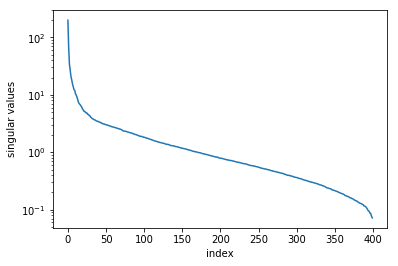

In [6]:
[U,S,V] = np.linalg.svd(img, full_matrices = False)
plt.semilogy(S)
plt.xlabel("index")
_ = plt.ylabel("singular values")

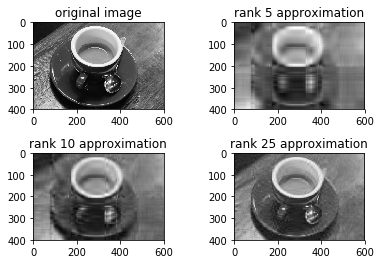

In [15]:
# constructing low rank approximation if images
k = 5
a5 = np.dot(U[:, :k] * S[:k], V[:k,:])
k = 10
a10 = np.dot(U[:, :k] * S[:k], V[:k,:])
k = 25
a25 = np.dot(U[:, :k] * S[:k], V[:k,:])

plt.subplot(2,2,1)
plt.gray()
_ = plt.imshow(img)
plt.title('original image')

plt.subplot(2,2,2)
plt.gray()
_ = plt.imshow(a5)
plt.title('rank 5 approximation')

plt.subplot(2,2,3)
plt.gray()
_ = plt.imshow(a10)
plt.title('rank 10 approximation')

plt.subplot(2,2,4)
plt.gray()
_ = plt.imshow(a25)
plt.title('rank 25 approximation')

_ = plt.subplots_adjust(wspace=0.5,hspace=0.5)

# Principal Component Analysis (PCA)

PCA is a well-known, and widely used technique for dimension reduction.  It is one of the machine learning algorithms you should know as a data scientist.  One of the first papers to introduce PCA as its known today, was published by Hotelling in 1933, http://dx.doi.org/10.1037/h0071325/.  The goal of a PCA, is to find a collection of $k$ orthogonal unit vectors, $v_1,v_2,\ldots, v_k$ (where $k$, the intrinsic dimension, is much smaller than the ambient dimension, $n$), such that the variance of the data set, projected in the direction of $v_i$ is maximized. 

Lets recall some definitions we have explored previously.  We assume that our data matrix, $X$, is comprised of $m$ observations, each of $n$ features.
\begin{align}
X = 
\begin{bmatrix}
x_1^T\\
x_2^T \\
\vdots \\
x_m^T
\end{bmatrix}
\end{align}
where $x_i \in \mathbb{R}^n$.  We can find the mean of each column, and store them in a vector $\mu$, satisfying
\begin{align}
\mu &= \frac{1}{m} \sum_{i=1}^m x_i\\
&= \left(  \frac{1}{m} \sum_{i=1}^m x_{i1}, \frac{1}{m} \sum_{i=1}^m x_{i2}, \ldots, \frac{1}{m} \sum_{i=1}^m x_{in}\right)^T
\end{align}
If will be convenient to refer to the data, centered about the mean as $X$, 
\begin{align}
X \leftarrow X - \mu \otimes 1 = 
\begin{bmatrix}
x_1^T - \mu^T\\
x_2^T - \mu^T\\
\vdots \\
x_m^T - \mu^T
\end{bmatrix}
\end{align}
The sample covariance about the mean can then be expressed:
\begin{align}
S = \frac{1}{m-1}\sum_{i=1}^m (x_i - \mu)(x_i - \mu)^T = \frac{1}{m-1}X^T X
\end{align}
The size of the covariance matrix is $n\times n$, as expected.

Mathematically, we know that the projection of an arbitrary vector $x_i \in \mathbb{R}^n$ in the direction of $v_j$ is found using the dot product, $v_j^T x_i$.  This means, that the variance of the dataset set, projected in the direction of the first principal direction $v_1$ can be written as
\begin{align}
\frac{1}{m-1} \sum_{i=1}^m (v_1^T x_i - v_1^T\mu)^2 = v_1^T S\, v_1
\end{align}
We wish to maximize the above quantity, subject to $\|v_1\|_2 = 1$.  Using Lagrange multipliers (which you will learn in optimization theory), the solution is 
\begin{align}
S \, v_1 = \lambda_1 v_1,
\end{align}
which tells us that $v_1$ must be an eigenvector of the covariance matrix $S$.  Also, since $\|v_1\|_2 = 1$, this allows us to conclude that the corresponding eigenvalue, $\lambda_1$, is exactly equal to the variance of the dataset along $v_1$, i.e. $\lambda_1 = v_1^T S\,v_1$.  We can then continue the process, projecting the data onto $v_2$, further enforcing that $v_1$ is orthogonal to $v_2$, and then iterating through the first $k$ principal directions.  

The final conclusion, is that the first $k$ principal vectors of $X$ correspond exactly to the eigenvectors of the covariance matrix, $S$, and the eigenvalues are the variance of the dataset along the corresponding eigenvectors.

# Relationship between SVD and PCA

Recall that $X = U\,S\,V^T$.  So, the scaled covariance matrix can be expressed as
\begin{align}
  (m-1)S = X^T X = (U\,S\,V^T)^T (U\,S\,V^T) = V(S^T S) V^T
\end{align}
which means that the matrix $X^T X$ and $S^T S$ are similar, i.e., they share the same eigenvalues.  Hence, the singular values of the matrix $X$, $\sigma_i$ are related to the eigenvalues, $\lambda_i$, of the covariance matrix $S$ via the formula
\begin{align}
\sigma_i^2 = (m-1)\lambda_i, \qquad i=1,\ldots,\text{rank}(X)
\end{align}

More importantly, consider again $X = U\,S\,V^T$.  Since $V$ is an orthogonal matrix, we have
\begin{align}
X\,V = U\,S
\end{align}
What is the $i$th column of $X\,V$?
\begin{align}
X\,v_i = ( (x_1-\mu)^T v_i, \ldots, (x_m-\mu)^T v_i)^T,
\end{align}
which is exactly the projection of the data onto the $i$th principal direction, $v_i$.  The corresponding column on the right hand side is $\sigma_i u_i$, which is what we are trying to recover.

Theoretically, one could compute the covariance matrix by forming $X^TX$, and then computing the eigen-decomposition to find the principal components.  This however turns out to be an unstable algorithm because computing $X^T\,X$ has a lot of floating point (round-off) error.  In practice, one avoids this numerical issue by computing the SVD of the data matrix $X$.  

## Example

Lets use sci-kit learn to find the PCA decomposition first

In [ ]:
from sklearn.decomposition import PCA

# data matrix from toy package example
X = np.array( [ [1.0,0], [0,1.0], [1,1]])

pca = PCA(n_components=2) # keep both components for now
pca.fit(X)
print("singular values")
print(pca.singular_values_)  
print("explained variance ratio")
print(pca.explained_variance_ratio_) 

and now, let's use the SVD decomposition to recover the same singular values.  We need to center the matrix about the mean.  The explained variance ratio can be computed as
\begin{align}
r = \frac{\sigma_i^2}{\sum \sigma_i^2}
\end{align}

In [ ]:
X = np.array( [ [1.0,0], [0,1.0], [1,1]])
mu = X.mean(axis=0)
X[:,0] = X[:,0] - mu[0]
X[:,1] = X[:,1] - mu[1]

[U,S,V] = np.linalg.svd(X, full_matrices = True)
print("singular values")
print(S)
print("explained variance ratio")
print(S**2/np.sum(S**2))

For completeness, we will now use the built-in PCA algorithm in Sci-kit learn to reduce the iris data set, and plot the various species along the largest two principal directions.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
pca = PCA(n_components=2) #this defines object that finds the largest 2 principal directions
pca.fit(X) # fit to data
X = pca.transform(X) # reduction

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

# Linear Discriminant Analysis

Linear discriminant analysis (LDA) is similar to PCA in that it seeks linear combination of variables to best explain the data.  However, PCA is an unsupervised technique; it does not utilize label information to construct the principle components.  If label information was available (e.g., the iris data set above), it would advantageous to utilize the label information for projection.

We will tackle only the basic case where there are two label classes (e.g. cancer/healthy, fraud/legit, etc.); there are extensions to handle the multi-class variant.  The approach is to project the high-dimensional data onto a one-dimensional line in such a way that the observations in each class are as separated as possible.   This is best illustrated in an example.

In [ ]:
X, y = datasets.make_blobs(n_samples=20, centers = 2, random_state=2)
colors = ['red', 'blue']
markers = ["o", "v"]
for color, i , mstyle in zip(colors, [0, 1], markers):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=2, marker = mstyle)

very blindly, if we project the data onto a line that is parallel to the $x$ axis, we see that the classes are not well separated.  However, if we project the data onto a line that is parallel to the $y$ axis, the classes are reasonably separated.  The goal is to fine a line so that the classes are as separated as possible.

In [ ]:
plt.subplot(1,2,1)
for color, i , mstyle in zip(colors, [0, 1], markers):
    plt.scatter(0.0*X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=2, marker = mstyle)

plt.subplot(1,2,2)
for color, i , mstyle in zip(colors, [0, 1], markers):
    plt.scatter(X[y == i, 0], 0.0* X[y == i, 1], color=color, alpha=.8, lw=2, marker = mstyle)

We first need to define what it means for the classes to be as separated as possible.  One natural measure of separation is to compute the difference in the mean of the projected points.  First, consider the mean of each class.  It is defined by 

\begin{align}
\mu_i = \frac{1}{|C_i|}\sum_{x \in C_i} x, 
\end{align}

where $|C_i|$ refers to the number of elements in Class $i$. 
If $v$ is the direction that we are projecting on to, the mean for each class of the *projected* data is 

\begin{align}
\hat{\mu}_i = \frac{1}{|C_i|}\sum_{x \in C_i} v^T x, 
\end{align}

where we have used the hat notation to denote the projected mean.  Conveniently, we have $\hat{\mu} = w^T \mu$.  Hence, the separation of the means for the two classes of projected data is:

\begin{align}
|\hat{\mu}_i - \hat{\mu}_2| = | v^T (\mu_1 - \mu_2)|
\end{align}


To obtain good class separation (which will give rise to good classification performance), we want the separation of the means to be as large as possible, relative to some measure of the standard deviation for observations in each class. 

We will use the "scatter" for each class of samples,

\begin{align}
\hat{s}_i^2 = \sum_{x\in C_i} (v^T x - \hat{\mu}_i)^2
\end{align}

The total within class scatter is then $\hat{s}_1^2 + \hat{s}_2^2$.

Linear discriminant analysis can then be posed as an optimization problem: maximize the function $J(v)$, where

\begin{align}
J(v) = \frac{|\hat{\mu}_1 - \hat{\mu}_2|^2}{\hat{s}_1^2 + \hat{s}_2^2}
\end{align}

With some linear algebra, the solution to the maximization problem can be written as

\begin{align}
v = S_w^{-1} (\mu_1 - \mu_2)
\end{align}

where $S_w$ is the within-class scatter matrix $S_w = S_1 + S_2$, with

\begin{align}
S_i = \sum_{x \in C_i} (x - \mu_i)(x - \mu_i)^T
\end{align}

Lets apply LDA to the iris example, and compare how it performs versus PCA.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

lda = LinearDiscriminantAnalysis(n_components=2)
X = lda.fit(X, y).transform(X)

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.xlabel("1st LDA component")
_ = plt.ylabel("2nd LDA component")

This wraps up a quick survey of linear dimension-reduction methods. 
- PCA: most commonly used; does not take classes into account
- LDA: also popular, takes classes into account.

Other approaches to linear dimension reduction include:
- non-negative matrix factorization (NMF).  If your data matrix is all positive, and one desires non-negative features, it is desirable to have a method for reducing dimension that is guaranteed to produce non-negative features.  idea: constrained optimization. 
- factor analysis: idea is to define latent variables (or common factors) and assume that the data features can be represented as a linear combination of these latent variables.  
- random projections: sometimes, the data set is so large (or expensive to access), that using the SVD or PCA is intractable.  Utilizing tools from randomized numerical linear algebra techniques (rNLA), one can use random projections to obtain a low-rank approximation to a data matrix  or it's inverse.   

Before venturing into the nonlinear dimension reduction realm (a.k.a. manifold learning), we first discuss how to estimate the intrinsic dimension of a dataset.

# Estimating Intrinsic Dimension

Vocabulary: we often refer to the "ambient" dimension, as the number of features/dimension of our data.  When people refer to big data, they often refer to a large number of samples and/or a large number of features (i.e. large ambient dimension).

As we have seen, data can sometimes be well approximated in lower dimension (see SVD discussion above).  Intrinsic dimension is defined as the smallest number of dimensions (or variables) needed to account for the observed properties of the data.

Modern approaches for estimating the intrinsic dimension is categorized as being *local* or *global*.
- local approaches estimate the dimensionality using information obtained from neighborhoods of the observations
- global approaches utilize the global properties of the data (e.g. the amount of variance explained by PCA).

We will explore one local estimator: the nearest neighbor approach.  Other local approaches include: computing the correlation dimension, computing the maximum likelihood.

## Nearest Neighbor Approach

The following discussion is loosely based on Pettis et. al (1979) http://dx.doi.org/10.1109/TPAMI.1979.4766873.  Let $r_{k,i}$ be the distance between sample $i$ and it's $k$th nearest neighbor.  We then define the average $k$th nearest neighbor distance as 

\begin{align}
\bar{r} = \frac{1}{m}\sum_{i = 1}^m r_{k,i}
\end{align}

Using probability arguments, Petis et. al (1979) show that the expected value of the average distance, $E(\bar{r})$ satisfies

\begin{align}
  E(\bar{r}) = \frac{1}{G_{k,d}} k^{1/d} C_m,
\end{align}

where $d$ is the intrinsic dimension we seek, $C_m$ is some constant that does not depend on $d$, and $G_{k,d}$ is a complicated looking term involving falling factorials,

\begin{align}
  G_{k,d} = \frac{k^{1/d} \Gamma(k)}{\Gamma(1 + k/d)}
\end{align}

Doing some algebra and using properties of logs, one can arrive at the equation
\begin{align}
\log{(G_{k,d})} + \log{E(\bar{r})} = \frac{1}{d}\log k + \log{C_m},
\end{align}

which can be solved using an iterative formula proposed by Pettis et. al.  At each step of the iteration, one solves a regression problem, fitting the above equation to data collected for various $k$-nearest neighbor measurements.

# Manifold Learning - brief survey

Often, data is not presented well by linear combinations of the features; visually, a hyperplane does not describe the data well. The alternative is non-linear dimension reduction (NLDR); visually, this tries to find a (non-linear) manifold that approximates the data well.

Sci-kit learn has various built-in approaches for manifold learning, http://scikit-learn.org/stable/modules/manifold.html, along with a more thorough description of each method. 
We give a brief summary of some of them, as well as a few others which are not listed. 

- Multi-dimensional Scaling (MDS) seeks to identify hidden structure in the data by finding configuration of data points in a low-dimensional space such that the Euclidean distance between points in the projected space represents, to some degree, the proximity between points in the high-dimensional space.  

- Isomap (Isometric mapping methods), is an extension of MDS; whereas MDS uses pairwise Euclidean distance to create the low-dimensional embedding, Isomap measures the geodesic distance induced by the graph of the neighborhood.

- Locally Linear Embedding (LLE), for each data sample, one finds the nearest neighbors and uses eigenvector-based optimization to express the point as a linear combination of its neighbors.  (i.e. we generate a piecewise linear manifold)

- Laplacian Eigenmaps (Belkin and Niyogi, NIPS 2001). We will explore this approach in this module, as it provides a theoretical framework for understanding LLE.  As part of the project, will be reading this seminal paper by Belkin and Niyogi (2003) http://web.cse.ohio-state.edu/~belkin.8/papers/LEM_NC_03.pdf.

- Hessian eigenmaps (Donoho and Grimes, 2003); this approach attempts to minimize the local curvature of the embedding manifold.

- Spectral Embedding - this projects the data onto the eigenvectors of the graph Laplacian. Sci-kit actually implements the Laplacian Eigenmaps when the spectral embedding function is called.

- t-distributed Stochastic Neighbor Embedding (t-SNE). This method models each high-dimensional data sample as a two- or three-dimensional object in such a way that similar objects are modeled by nearby low-dimensional points, and dissimilar objects are modeled by distant low-dimensional points, with high probability. 

- charting (Brand, NIPS 2002): uses density estimation to learn the manifold.  This approach is more robust to noisy or sparsely sampled data.

### Comparisons

There are a few examples on sci-kit learn that illustrate how various NLDR techniques behave.
- [reducing the S-curve](http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py)
- [the severed sphere](http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py)
- [hand written digits](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)

# Laplacian Eigenmaps

The general idea is as follows.  We let $x_1,\ldots,x_m$ denote our $m$ observations in $\mathbb{R}^n$.  The algorithm seeks to generate a weighted graph with these $m$ nodes, one for each sample, and a set of edges that connect to other samples.  The low-dimensional manifold (embedding map) is then found by computing the eigenvalues of the graph Laplacian, and retrieving the surface constructed using the smallest eigenvalues.  The theoretical justification is beyond the scope of this course, but the interested reader can look at Belkin and Niyogi (2003).

The algorithm has 3 main steps:

1. Construct the graph
2. Compute the graph Laplacian
3. Embed data using the graph Laplacian

### Step 1: construct the similarity graph.

The similarity graphs are meant to model the relationship between data samples in a *local* neighborhood.  In general, a graph is fully described by vertices, edges and weights.  
- the vertices here are obvious: all the data points
- there are several approaches on how to construct the edges 
    1. put an edge between 2 data samples if they are within $\epsilon$ distance of each other
    2. put an edge between 2 data points if they are k-nearest-neighbors of each other. Note, this definition can be generalized to cases where $x_i$ can be a neighbor of $x_j$ but not vice versa.  This can lead to three types of graphs:
        - directed graph: add an edge, $x_i \rightarrow x_j$ if $x_i$ is a kNN of $x_j$.
        - symmetric graph: add edge, $x_i - x_j$ if ($x_i$ is a kNN of $x_j$) *OR* ($x_j$ is a kNN of $x_i$).
        - mutual graphL add edge, $x_i - x_j$ if ($x_i$ is a kNN of $x_j$) *AND* ($x_j$ is a kNN of $x_i$). 
- weights.  Many choices here.  Most often:
    1. equal weighting.  Set $W_{ij} = 1$ if an edge exists between $x_i$ and $x_j$
    2. weight based on distance, e.g., 
    \begin{align}
    W_{ij} = \exp{\left(-\frac{\|x_i - x_j\|_2^2}{2 t^2}\right)}
    \end{align}
    where $t$ is a tuning parameter.

There are some implementation choices that are important when generating the similarity graph.  The first obvious choice is on how to construct the edge.  $\epsilon$-neighborhood, or kNN.  Once you've picked one, you then have to decide either how to choose $\epsilon$, or how to choose $k$.  This is an art.  The goal is to preserve local information, so you don't want to choose neighborhood sizes that are too large; the flip side, is you want to choose $\epsilon$ and $k$ large enough so that you capture dependency of data with each other.  

### Step 2: Compute the graph Laplacian

The graph Laplacian, $L$, of the constructed graph is defined as $L = D - W$, where
- $W$ is the weight matrix, size $m\times m$, defined above.
- $D$ is the degree matrix.  The degree matrix is a diagonal matrix of size $m\times m$, and whose entries $d_{ii}$ is the degree of vertex $i$, i.e., the sum of all weights that are connected to vertex $i$.  

### Step 3: Embed data using graph Laplacian

- Find the eigenvalues and eigenvectors of the graph Laplacian
- if a $d$ dimensional projection is desired, project data onto eigenvectors associated with $d$ smallest eigenvalues.  Intuition question: why $d$ smallest eigenvalues?

Part of your next project will be to apply Laplacian Eigenmaps to the swiss-roll data set.  The goal is to recover the Laplacian eigenmaps associated with the swiss roll:
[Laplacian Eigenmap for Swiss Roll](figures/EigenMap-SwissRoll.png)